# E2.6

##E2.6.FirstSolution

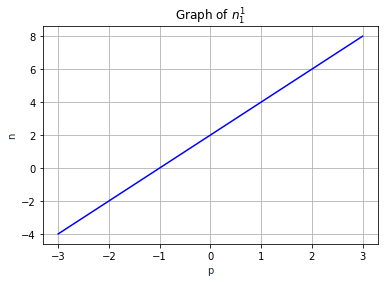

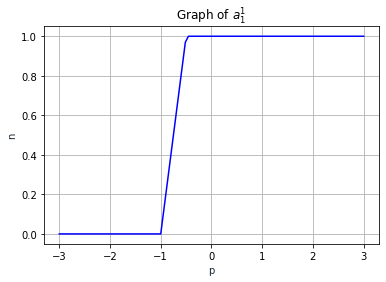

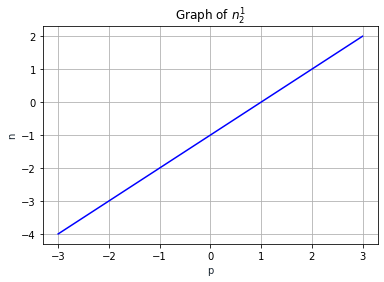

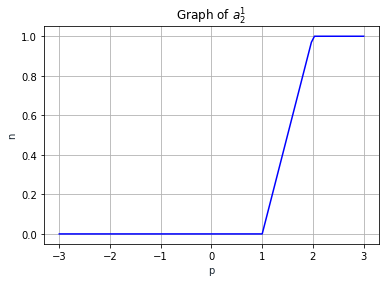

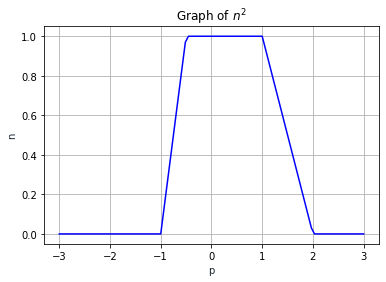

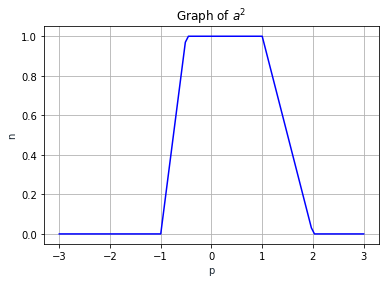

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hardlim(x):
    return np.where(x >= 0, 1, 0)
def hardlims(x):
    return np.where(x >= 0, 1, -1)
def purelin(x):
  return x
def satlin(x):
    return np.maximum(0, np.minimum(x, 1))
def logsig(x):
    return 1/(1+np.exp(-x))
def htansig(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def poslin(x):
    return np.maximum(0, x)
def compet(x):
    return (x==np.max(x)).astype(int)        

def plotfunc(k) :
  plt.plot(p, k, '-b')
  plt.xlabel('p', color = '#1C2833' )
  plt.ylabel('n', color = '#1C2833' )
  plt.grid()

weights = [2, 1, 1, -1]
bias = [2, -1, 0]
p = np.linspace(-3, 3, 100) #Plot indicated variable versus p for −3<p<3

#i.
n_1 = p*weights[0] + bias[0]
#ii.
a_1 = satlin(n_1)
#iii.
n_2 = p*weights[1] + bias[1]
#iv.
a_2 = satlin(n_2)
# v.
n_n = a_1*weights[2] + a_2*weights[3] + bias[2]
#vi.
a_a = purelin(n_n)

# plot i .
plt.title('Graph of $n_1^1$')
plotfunc(n_1)
plt.savefig('020601.pdf')
plt.show()
# plot ii.
plt.title('Graph of $a_1^1$')
plotfunc(a_1)
plt.savefig('020602.pdf')
plt.show()
# plot iii.
plt.title('Graph of $n_2^1$')
plotfunc(n_2)
plt.savefig('020603.pdf')
plt.show()
# plot iv.
plt.title('Graph of $a_2^1$')
plotfunc(a_2)
plt.savefig('020604.pdf')
plt.show()
# plo t v.
plt.title('Graph of $n^2$')
plotfunc(n_n)
plt.savefig('020605.pdf')
plt.show()
# plot vi.
plt.title('Graph of $a^2$')
plotfunc(a_a)
plt.savefig('020606.pdf')
plt.show()

##E2.6.SecondSolution

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 17HX8kM00yyyZ96Sylalrw6u3Mp25nQyb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=17HX8kM00yyyZ96Sylalrw6u3Mp25nQyb
To: /content/transfer_functions.py
100% 1.09k/1.09k [00:00<00:00, 2.07MB/s]


<ipython-input-7-d670df4c7c19>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.vectorize(f, otypes=[np.float])


[[0.]
 [0.]]


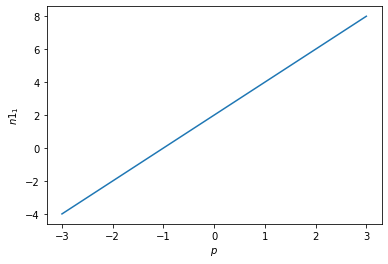

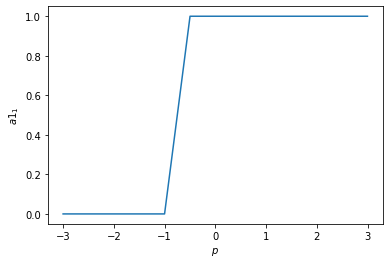

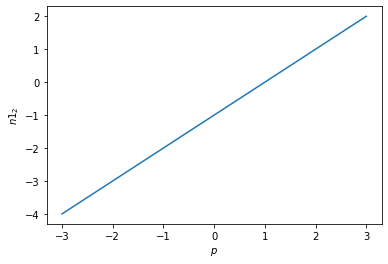

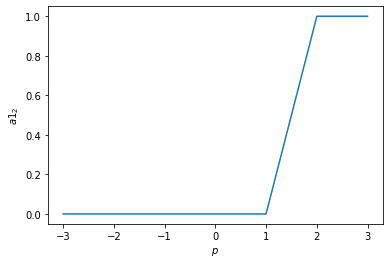

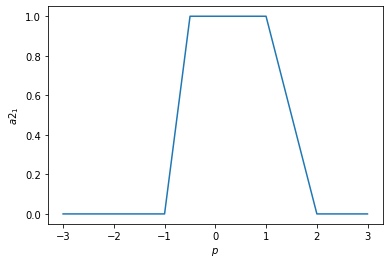

In [ ]:
"""
Consider the following NN:
p -> Sat. Linear Layer (2 nodes) - > Linear Layer
Where:
    - W1[1, 1] = 2, B1[1] = 2
    - W1[2, 1] = 1, B1[2] = -1
    - W2 = [1, -1], B2[1] = 0
"""

import numpy as np
import matplotlib.pyplot as plt

from transfer_functions import *

def calculate_net_input(W=np.array(1), p=np.array(2.0), b=-3):
    return W.dot(p) + b

def layer(p, W, b, f):
    n = calculate_net_input(W=W, p=p, b=b)
    f = np.vectorize(f, otypes=[np.float])
    return f(n)

def vectorized_implementation(p, W1=[2,1], b1=[2,1], W2=[1,-1], b2=0):
    input_size = p.shape[0]

    W1 = np.array(W1).reshape((2, 1))
    W1 = W1.repeat(p.shape[0], axis=1)

    b1 = np.array(b1).reshape((2,1))

    a1 = layer(p=p, W=W1, b=b1, f=satlin)   

    W2 = np.array(W2).reshape((2, 1))
    W2 = W2.repeat(a1.shape[0], axis=1)

    b2 = np.array(b2).reshape((1,1))
    a2 = layer(p=a1, W=W2, b=b2, f=purelin)

    return a2

if __name__ == "__main__":
    p = (np.array(range(-3000, 3000, 1)) / 1000).reshape(6000, 1)
    W1=np.array([2,1])
    b1=np.array([2,-1])
    W2=np.array([1,-1])
    b2=0

    a2 = vectorized_implementation(p=p, W1=W1, b1=b1, W2=W2, b2=b2)
    print(a2)

    # Non vectorized implementation for plotting
    n1_1 = list([])
    a1_1 = list([])
    for p_i in p:
        n = calculate_net_input(p=np.array(p_i), W=np.array(W1[0]), b=b1[0])[0]
        a = satlin(n)
        n1_1.append(n)
        a1_1.append(a)
    n1_1 = np.array(n1_1)
    a1_1 = np.array(a1_1)
    
    plt.plot(p, n1_1)
    plt.xlabel("$p$")
    plt.ylabel("$n1_1$")
    plt.savefig('020611.pdf')
    plt.show()

    plt.plot(p, a1_1)
    plt.xlabel("$p$")
    plt.ylabel("$a1_1$")
    plt.savefig('020612.pdf')
    plt.show()

    n1_2 = list([])
    a1_2 = list([])
    for p_i in p:
        n = calculate_net_input(p=np.array(p_i), W=np.array(W1[1]), b=b1[1])[0]
        a = satlin(n)
        n1_2.append(n)
        a1_2.append(a)
    n1_2 = np.array(n1_2)
    a1_2 = np.array(a1_2)
    
    plt.plot(p, n1_2)
    plt.xlabel("$p$")
    plt.ylabel("$n1_2$")
    plt.savefig('020613.pdf')
    plt.show()

    plt.plot(p, a1_2)
    plt.xlabel("$p$")
    plt.ylabel("$a1_2$")
    plt.savefig('020614.pdf')
    plt.show()

    n2_1 = list([])
    a2_1 = list([])

    for i in range(len(a1_1)):
        n = calculate_net_input(p=np.array([a1_1[i], a1_2[i]]).reshape((2, 1)), W=W2, b=b2)[0]
        a = purelin(n)
        n2_1.append(n)
        a2_1.append(a)
    n2_1 = np.array(n2_1)
    a2_1 = np.array(a2_1)

    plt.plot(p, a2_1)
    plt.xlabel("$p$")
    plt.ylabel("$a2_1$")
    plt.savefig('020615.pdf')
    plt.show()